<a href="https://colab.research.google.com/github/prasad4fun/ML-Portfolio/blob/master/percpt_and_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

def random_uniform(a, b):return a+(b-a)*np.random.uniform()

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=200, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = [random_uniform(-2,2) for w in range(no_of_inputs + 1)]
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
        return self.weights

In [35]:
import numpy as np

training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
weights = perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
perceptron.predict(inputs) 
#=> 1

inputs = np.array([0, 1])
perceptron.predict(inputs) 
#=> 0

0

In [36]:
weights

[-1.0289245186807496, 1.0091492839333651, 0.7102841696727464]

In [37]:
res = perceptron.predict(np.array([1, 1])), perceptron.predict(np.array([1, 0])), perceptron.predict(np.array([0, 1])), perceptron.predict(np.array([0, 0]))
res

(1, 0, 0, 0)

In [38]:
training_inputs

[array([1, 1]), array([1, 0]), array([0, 1]), array([0, 0])]

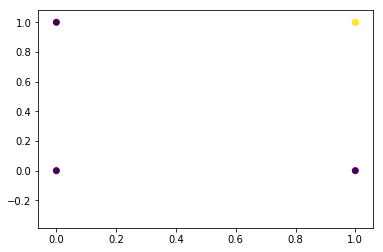

In [39]:
plt.scatter([point[0] for point in training_inputs], [point[1] for point in training_inputs], c = labels)
plt.plot(weights[1], weights[2]+weights[0])
plt.show()

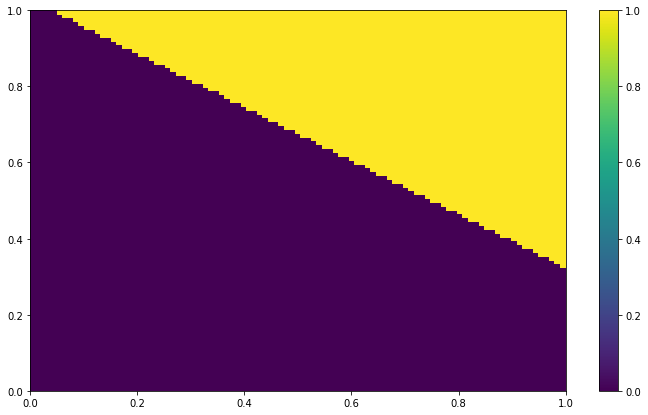

In [45]:
from itertools import product

plt.figure(figsize = (12,7))
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
point_grid = list(product(x_values, y_values))
distances = [perceptron.predict(p) for p in point_grid]
abs_distances = [abs(i) for i in distances]
distance_matrix = np.reshape(abs_distances, (100,100))
heatmap = plt.pcolormesh(x_values, y_values, distance_matrix)
plt.colorbar(heatmap)
plt.show()
#You should see a purple line where the distances are 0. That’s the decision boundary!